<h2 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Boston Housing Price Prediction: Regression Models Evaluation
</h2>

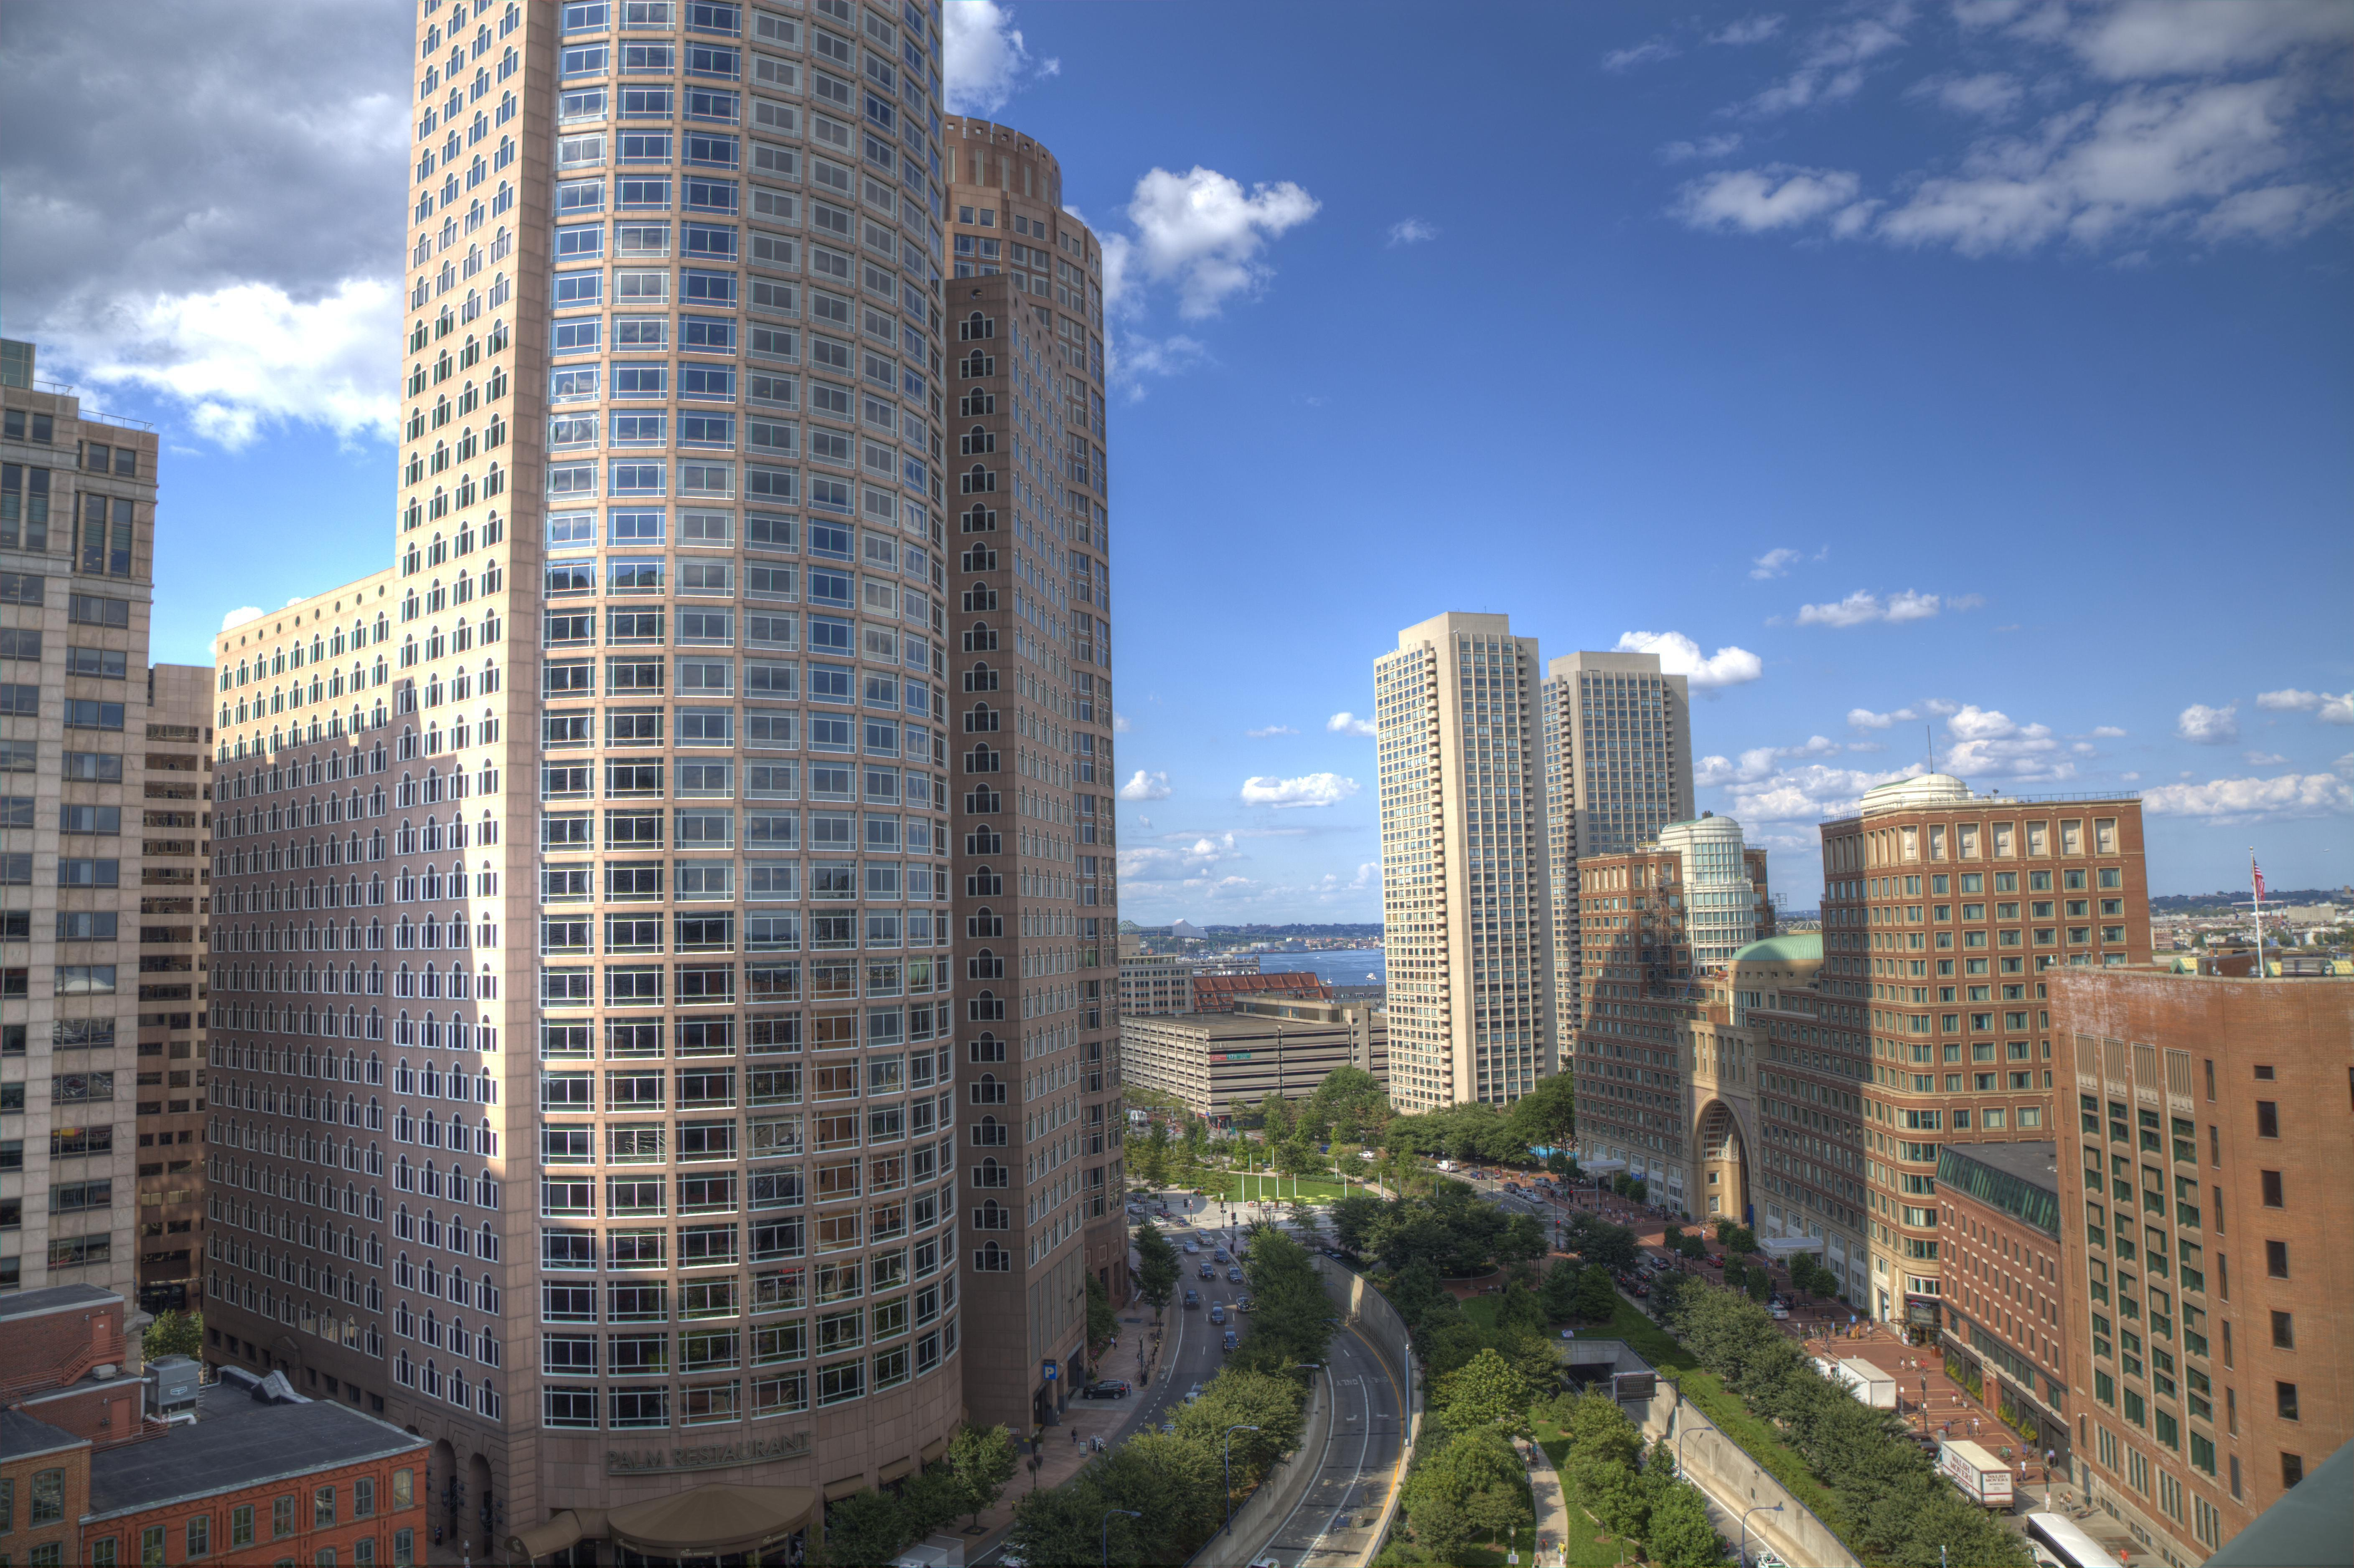

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Introduction
</h6>

This dataset contains information about housing in various areas, detailing 13 attributes for each location. These attributes include crime rate (crim), residential land zone (zn), and proportion of non-retail business acres (indus). Additional features such as nitric oxide concentration (nox), number of rooms (rm), and property tax rate (tax) provide insights into environmental and structural factors. The target variable, medv, represents the median value of owner-occupied homes in thousands of dollars.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Dataset
</h6>

This dataset comprises various features related to housing in different areas, providing insights into environmental, structural, and economic aspects. Below is an explanation of each attribute:

1. **crim**: Per capita crime rate by town.
2. **zn**: Proportion of residential land zoned for lots over 25,000 square feet.
3. **indus**: Proportion of non-retail business acres per town.
4. **chas**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
5. **nox**: Nitric oxide concentration (parts per 10 million).
6. **rm**: Average number of rooms per dwelling.
7. **age**: Proportion of owner-occupied units built prior to 1940.
8. **dis**: Weighted distances to five Boston employment centers.
9. **rad**: Index of accessibility to radial highways.
10. **tax**: Full-value property tax rate per 10,000 dollar.
11. **ptratio**: Pupil-teacher ratio by town.
12. **b**: 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town.
13. **lstat**: Percentage of lower status of the population.
14. **medv**: Median value of owner-occupied homes in 1000s.

The dataset captures a range of factors that influence housing values, including crime rates, environmental quality, property tax rates, and socio-economic status, enabling comprehensive analysis of the housing market.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Objectives
</h6>

1. **Explore and Read the Dataset**:
   - Load the dataset and examine its structure and summary statistics.
   - Visualize the distribution and relationships of various features.

2. **Clean the Dataset**:
   - Handle missing values, outliers, and incorrect data entries.
   - Normalize or scale numerical features and encode categorical variables if necessary.

3. **Implement a Couple of Regression ML Algorithms**:
   - Train and evaluate multiple machine learning algorithms, such as Linear Regression, Decision Trees, naive bayes, and random forest.
   

4. **Compare the Models' Performance**:
   - Evaluate each model using regression-specific metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and \( R^2 \). These metrics provide insights into the accuracy of predictions and the variance explained by the model.
   - Apply cross-validation to assess the robustness and generalizability of the models.


5. **Draw Conclusions**:
   - Interpret the findings and highlight the most effective models.
   - Provide insights into the important features that influence housing values.
   - Suggest potential real-world applications of the models and recommend future improvements.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    import libraries
</h6>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Load the data
</h6>

In [ ]:
df = pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")
df.head()

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Exploratory Data Analysis
</h6>

In [ ]:
# take a look at the summary of the dataset
df.info()

In [ ]:
# ckeck for null values
df.isna().sum()

In [ ]:
# ckeck for data types (wee can see all the columns data types are numerical)
df.dtypes

In [ ]:
# check for any negative values in the medv column (no negative values)
df[df['medv'] < 0]

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Statistical Summary
</h6>

In [ ]:
# Statistical summary for all numerical columns
df.describe()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Correlation Matrix
</h6>

In [ ]:
# ckeck for the correlation between the columns
df.corr()

In [ ]:
# ckeck for the correlation between the columns using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Data Cleaning
</h6>

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Missing Values
</h6>

In [ ]:
# deal with missing values
df["rm"].fillna(df["rm"].mean(), inplace=True)
df.isna().sum()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Memory Usage
</h6>

In [ ]:
# show memory usage before cleaning
df.memory_usage()

In [ ]:
# convert all columns from 64 bit to 32 bit to save memory (float64 to float32 and int64 to int32)
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    if df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')

In [ ]:
# show memory usage after cleaning
df.memory_usage()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Handling Outliers
</h6>

In [ ]:
# Handling outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all numerical columns
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df = handle_outliers(df, col)

# Verify the changes
df.describe()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Feature and Target Separation
</h6>

In [ ]:
# Splitting features and target
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Features Scaling
</h6>

In [ ]:
# Scale the features (to ensure that all features contribute equally to the model)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Compare the Models' Performance
</h6>

* Train and evaluate multiple machine learning algorithms, such as Linear Regression, Decision Trees, naive bayes, and random forest.

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Create Plot Function
</h6>

In [ ]:
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y_test, predictions, alpha=0.7, edgecolors='w', linewidth=0.5, label='Predicted vs Actual')
    
    # Diagonal line for perfect predictions
    min_val = np.min(y_test)
    max_val = np.max(y_test)
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction Line')
    
    # Adding labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Predictions vs Actual Values')
    
    # Adding legend and grid
    plt.legend(loc='upper left')
    plt.grid(True)
    
    plt.show()

# Example usage with numpy arrays
y_test_array = np.array(y_test)


<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Linear Regression
</h6>

* Linear Regression is a simple and widely used regression algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It assumes a linear relationship between the input variables and the target variable. Linear Regression is easy to interpret and computationally efficient, but it may not capture complex patterns in the data.

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R2 Score:", r2_score(y_test, lr_predictions))
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_predictions, squared=False))

In [ ]:
# Plot for Linear Regression
lr_predictions_array = np.array(lr_predictions)
plot_predictions(y_test_array, lr_predictions_array, 'Linear Regression')

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Decision Tree Regressor
</h6>

* Decision Tree Regressor is a non-linear regression algorithm that uses a tree-like model of decisions and their possible consequences. It splits the data into subsets based on feature values, and the splits are chosen to maximize the reduction in variance. Decision Trees can capture complex patterns in the data but are prone to overfitting if not properly pruned.

In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluation
print("Decision Tree R2 Score:", r2_score(y_test, dt_predictions))
print("Decision Tree RMSE:", mean_squared_error(y_test, dt_predictions, squared=False))

In [ ]:
# Plot for Decision Tree Regressor
dt_predictions_array = np.array(dt_predictions)
plot_predictions(y_test_array, dt_predictions_array, 'Decision Tree Regressor')

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Gaussian Naive Bayes
</h6>

* Gaussian Naive Bayes is typically a classification algorithm based on Bayes' Theorem with the assumption of independence among features. For regression, it's an unconventional choice and might not perform as well as other regression algorithms. It assumes that the input features follow a Gaussian distribution and predicts the mean of the target variable.

In [ ]:
# # Gaussian Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# gnb_model = GaussianNB()
# gnb_model.fit(X_train, y_train)
# gnb_predictions = gnb_model.predict(X_test)

# # Evaluation
# print("Gaussian Naive Bayes R2 Score:", r2_score(y_test, gnb_predictions))
# print("Gaussian Naive Bayes RMSE:", mean_squared_error(y_test, gnb_predictions, squared=False))

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
    Random Forest Regressor
</h6>

* Random Forest Regressor is an ensemble learning method that combines multiple decision trees to improve the overall performance and reduce overfitting. Each tree is built on a subset of the data, and the final prediction is obtained by averaging the predictions of all trees. Random Forests are robust, handle large datasets well, and can capture complex patterns in the data.

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("Random Forest R2 Score:", r2_score(y_test, rf_predictions))
print("Random Forest RMSE:", mean_squared_error(y_test, rf_predictions, squared=False))

In [ ]:
# Plot for Random Forest Regressor
rf_predictions_array = np.array(rf_predictions)
plot_predictions(y_test_array, rf_predictions_array, 'Random Forest Regressor')

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Compare the Models' Performance
</h6>

In [ ]:
# Compare performance using R2 scores and RMSE
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [
    r2_score(y_test, lr_predictions),
    r2_score(y_test, dt_predictions),
    r2_score(y_test, rf_predictions)
]
rmse_scores = [
    mean_squared_error(y_test, lr_predictions, squared=False),
    mean_squared_error(y_test, dt_predictions, squared=False),
    mean_squared_error(y_test, rf_predictions, squared=False)
]

# Plotting the R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_scores)
plt.title('Model R2 Score Comparison')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.show()

# Plotting the RMSE scores
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_scores)
plt.title('Model RMSE Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
   Apply cross-validation
</h6>
 Cross-validation helps ensure that the performance metrics are reliable and not overly dependent on a particular train-test split.

In [ ]:
def cross_validate_model(model, X, y, cv=5):
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(r2_scores)

#  Cross-validation for each model
lr_cv_mse, lr_cv_rmse, lr_cv_r2 = cross_validate_model(lr_model, X_train, y_train)
dt_cv_mse, dt_cv_rmse, dt_cv_r2 = cross_validate_model(dt_model, X_train, y_train)
rf_cv_mse, rf_cv_rmse, rf_cv_r2 = cross_validate_model(rf_model, X_train, y_train)

In [ ]:
# Cross-validation results
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [lr_cv_mse, dt_cv_mse, rf_cv_mse]
rmse_scores = [lr_cv_rmse, dt_cv_rmse, rf_cv_rmse]
r2_scores = [lr_cv_r2, dt_cv_r2, rf_cv_r2]

# Set up the bar positions and width
bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

# Plot MSE, RMSE, and R2 for each model
bar1 = ax.bar(index - bar_width, mse_scores, bar_width, label='MSE')
bar2 = ax.bar(index, rmse_scores, bar_width, label='RMSE')
bar3 = ax.bar(index + bar_width, r2_scores, bar_width, label='R2')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Cross-Validation Scores for Regression Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Add value annotations on the bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')

plt.tight_layout()
plt.show()


<h6 style="font-size:25px; font-family:Garamond; font-weight:normal; background-color:#4CAF50; color:#FFFFFF; text-align:center; border-radius:5px 5px; padding:5px">
   Model Evaluation with Cross-Validation
</h6>

1. **Random Forest Regressor (CV)**
   - **MSE**: 9.10
   - **RMSE**: 3.01
   - **R2**: 0.85
   - **Analysis**: The Random Forest Regressor has the lowest MSE and RMSE, and the highest R2 score, indicating it has the best overall performance in terms of prediction accuracy and variance explanation.

2. **Linear Regression (CV)**
   - **MSE**: 13.53
   - **RMSE**: 3.68
   - **R2**: 0.77
   - **Analysis**: Linear Regression has higher MSE and RMSE compared to Random Forest, but it still performs reasonably well with a good R2 score. It indicates that the model is capturing a significant portion of the variance but with higher prediction errors.

3. **Decision Tree Regressor (CV)**
   - **MSE**: 17.12
   - **RMSE**: 4.10
   - **R2**: 0.71
   - **Analysis**: The Decision Tree Regressor has the highest MSE and RMSE, and the lowest R2 score among the three models. This suggests that it is less accurate in predicting the target variable and may be overfitting or not capturing the data's complexity as effectively as the other models.

### **Summary**

1. **Best Performing Model**: **Random Forest Regressor**. With the lowest MSE and RMSE and the highest R2 score, it provides the most accurate predictions and explains the variance in the target variable the best.

2. **Cross-Validation**: The results from cross-validation suggest that the Random Forest model is robust and generalizes well across different subsets of the data, making it the preferred model for deployment. 



<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Conclusion
</h6>

In this project, we applied and evaluated three regression algorithms—Linear Regression, Decision Tree Regressor, and Random Forest Regressor—to predict housing prices based on various features.

**Insights:**

- **Random Forest Regressor** achieved the highest R2 score and lowest RMSE, demonstrating the best performance in capturing the variance in housing prices and making accurate predictions.
- **Linear Regression** had the highest RMSE, indicating its limitations in modeling complex relationships within the dataset.
- **Decision Tree Regressor** offered a compromise between model complexity and performance but did not match the effectiveness of the Random Forest model.

In summary, the Random Forest Regressor emerged as the most robust and accurate model for predicting housing prices. Further improvements can be made through hyperparameter tuning and feature engineering to enhance model performance even further.

<h6 style="font-size:50px; font-family:Garamond; font-weight:normal; background-color:#3E8E7E; color:#F5F5F5; text-align:center; border-radius:5px 5px; padding:5px">
    Don't forget to upvote if you liked the notebook
</h6>